<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB01/Practica3CLAUDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import requests
import pandas as pd

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB01/USA.xlsx"
# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en un archivo local
    with open('USA.xlsx', 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_excel('USA.xlsx')
df.head(10)

Archivo descargado exitosamente.


,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
1,Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
2,San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
3,Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
4,Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0
5,Wilmington,36.0,54.0,80.0,80.0,9.0,40.25,114.0
6,Washington,29.0,57.3,434.0,757.0,9.3,38.89,111.0
7,Jacksonville,14.0,68.4,136.0,529.0,8.8,54.47,116.0
8,Miami,10.0,75.5,207.0,335.0,9.0,59.80,128.0
9,Atlanta,24.0,61.5,368.0,497.0,9.1,48.34,115.0


1. Leemos el archivo Excel en un DataFrame de `pandas`.

2. Seleccionamos las columnas que queremos estandarizar. En este ejemplo, seleccionaremos todas las columnas numéricas.

3. Creamos un objeto `StandardScaler`.

4. Estandarizamos las columnas seleccionadas utilizando el método `fit_transform`.
Muestra las primeras filas del DataFrame estandarizado.

Al estandarizar, centramos los datos para que tengan una media de 0 y escalándolos para que tengan una desviación estándar de 1. Esto ayuda a manejar las diferencias de rango y facilita el procesamiento de la información.

In [52]:

from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas que deseas estandarizar (aquí se usan todas las columnas numéricas)
columns_to_standardize = df.select_dtypes(include=['float64', 'int64']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las columnas seleccionadas
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Mostrar las primeras filas del DataFrame estandarizado
df.head(10)


,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,Phoenix,-0.864758,2.036213,-0.449363,-0.046520,-2.440555,-2.556012,-2.975514
1,Little Rock,-0.735360,0.733515,-0.668567,-0.833224,-0.881504,1.010653,-0.531009
2,San Francisco,-0.778493,0.131192,-0.018143,0.187743,-0.527174,-1.385471,-1.791457
3,Denver,-0.562829,-0.541168,-0.016346,-0.163651,-0.314576,-2.048577,-1.065744
4,Hartford,1.119347,-0.933378,-0.091810,-0.787770,-0.314576,0.567723,0.500266
5,Wilmington,0.256692,-0.247010,-0.688331,-0.924132,-0.314576,0.299384,0.003726
6,Washington,-0.045237,0.215237,-0.052281,0.259420,-0.101978,0.182416,-0.110860
7,Jacksonville,-0.692227,1.770071,-0.587713,-0.139176,-0.456308,1.522388,0.080117
8,Miami,-0.864758,2.764604,-0.460144,-0.478333,-0.314576,1.980800,0.538462
9,Atlanta,-0.260900,0.803553,-0.170867,-0.195120,-0.243710,0.995172,0.041922


Para obtener los autovalores (eigenvalues) y autovectores (eigenvectors) que nos permitan determinar cuántos componentes principales necesitamos para representar los datos iniciales, seguiremos los siguientes pasos:

In [53]:
import pandas as pd
import numpy as np

# Seleccionar las columnas que deseas incluir en el análisis de componentes principales
columns_for_pca = df.select_dtypes(include=['float64', 'int64']).columns

# Obtener la matriz de covarianza
cov_matrix = np.cov(df[columns_for_pca], rowvar=False)

# Obtener autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los autovalores y autovectores de mayor a menor
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calcular el porcentaje de varianza y el acumulado por cada componente
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Crear un DataFrame con el porcentaje de varianza y el acumulado por cada componente
pca_results = pd.DataFrame({
    'Componente': range(1, len(explained_variance_ratio) + 1),
    'Porcentaje de Varianza': explained_variance_ratio,
    'Varianza Acumulada': cumulative_explained_variance
})

# Mostrar el DataFrame con los resultados
print(pca_results)

   Componente  Porcentaje de Varianza  Varianza Acumulada
0           1                0.389731            0.389731
1           2                0.216048            0.605779
2           3                0.199282            0.805061
3           4                0.127427            0.932488
4           5                0.049540            0.982028
5           6                0.014327            0.996355
6           7                0.003645            1.000000


Interpretación de los resultados:

Los resultados proporcionados corresponden al análisis de componentes principales (PCA). Aquí hay una interpretación paso a paso de los datos:

**Componente 1**: Explica el 38.97% de la variabilidad en los datos.

**Componente 2**: Añade un 21.60% adicional, acumulando un 60.58% de explicación total.

**Componente 3**: Contribuye con un 19.93%, alcanzando una varianza acumulada de 80.51%.

**Componente 4**: Aporta un 12.74%, sumando hasta un 93.25% de la varianza total.

**Componente 5**: Proporciona un 4.95%, llevando la varianza acumulada al 98.20%.

**Componente 6**: Contribuye con un 1.43%, sumando un total del 99.64%.

**Componente 7**: Aporta un 0.36%, alcanzando el 100% de varianza acumulada.

Podemos una disminución gradual en el porcentaje de varianza explicada por cada componente adicional. Los que más aportan serían los cuatro primeros.

1. Seleccionamos las columnas que deseamos incluir en el análisis de componentes principales (en este caso, todas las columnas numéricas).

2. Calculamos la matriz de covarianza utilizando np.cov().

3. Obtenemos los autovalores y autovectores mediante np.linalg.eig().

4. Ordenamos los autovalores y autovectores de mayor a menor.

5. Calculamos el porcentaje de varianza explicada y la varianza acumulada por cada componente principal.

6. Creamos un DataFrame con los resultados para analizar el porcentaje de varianza explicada y la varianza acumulada por cada componente.

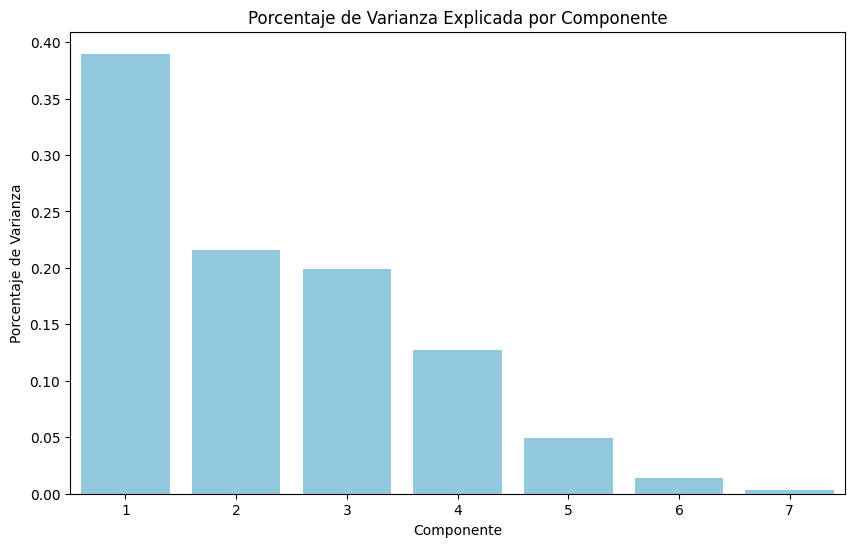

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras para el porcentaje de varianza explicada
plt.figure(figsize=(10, 6))
sns.barplot(x='Componente', y='Porcentaje de Varianza', data=pca_results, color='skyblue')
plt.title('Porcentaje de Varianza Explicada por Componente')
plt.show()

Este gráfico nos da una idea visual de la contribución relativa de cada componente a la varianza total.

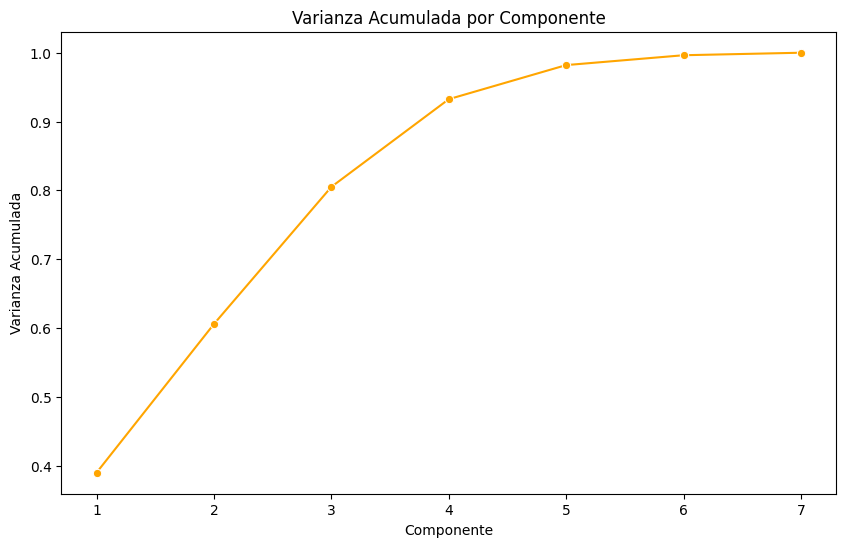

In [55]:
# Crear un gráfico de línea para la varianza acumulada
plt.figure(figsize=(10, 6))
sns.lineplot(x='Componente', y='Varianza Acumulada', data=pca_results, marker='o', color='orange')
plt.title('Varianza Acumulada por Componente')
plt.show()

Este gráfico muestra cómo la varianza acumulada aumenta a medida que consideramos más componentes. Esto nos ayuda a decidir cuántos componentes necesitamos para alcanzar un nivel deseado de varianza explicada. Como hemos sacado en las conclusiones numéricas, podemos ver que las cuatro primeras componentes son las que más fuerza tienen.

In [56]:
# Proyección de los datos en el espacio de las componentes principales
pca_data = df[columns_for_pca].dot(eigenvectors)

# Añadir las componentes principales al DataFrame original
df = pd.concat([df, pca_data.add_prefix('Componente_')], axis=1)
df

,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias,Componente_0,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6
0,Phoenix,-0.864758,2.036213,-0.449363,-0.046520,-2.440555,-2.556012,-2.975514,-2.715976,-3.891439,-1.058355,-1.537443,-0.033133,0.654428,-0.090607
1,Little Rock,-0.735360,0.733515,-0.668567,-0.833224,-0.881504,1.010653,-0.531009,-1.717745,0.482420,-0.850043,-0.194537,-0.142133,-0.544992,0.198665
2,San Francisco,-0.778493,0.131192,-0.018143,0.187743,-0.527174,-1.385471,-1.791457,-0.938965,-2.237246,0.183748,-0.152791,0.185592,-0.295074,-0.007136
3,Denver,-0.562829,-0.541168,-0.016346,-0.163651,-0.314576,-2.048577,-1.065744,-0.549861,-1.971943,1.228596,-0.422692,0.383684,0.130106,0.157988
4,Hartford,1.119347,-0.933378,-0.091810,-0.787770,-0.314576,0.567723,0.500266,0.460372,1.097335,0.589704,-0.938705,-0.742690,-0.400483,0.260189
5,Wilmington,0.256692,-0.247010,-0.688331,-0.924132,-0.314576,0.299384,0.003726,-0.697076,0.632149,0.421329,-0.488869,-0.544985,-0.204217,0.050735
6,Washington,-0.045237,0.215237,-0.052281,0.259420,-0.101978,0.182416,-0.110860,-0.046126,-0.050898,-0.354232,0.044025,0.029343,-0.069678,-0.191097
7,Jacksonville,-0.692227,1.770071,-0.587713,-0.139176,-0.456308,1.522388,0.080117,-1.376014,0.938397,-1.865963,0.454386,-0.013845,0.120570,-0.179975
8,Miami,-0.864758,2.764604,-0.460144,-0.478333,-0.314576,1.980800,0.538462,-1.715728,1.507995,-2.585263,0.829400,-0.056856,0.719550,0.183303
9,Atlanta,-0.260900,0.803553,-0.170867,-0.195120,-0.243710,0.995172,0.041922,-0.618589,0.638089,-0.988363,0.196077,-0.112149,-0.098994,0.071121


Información sobre las ciudades seleccionadas:
        Ciudad  Componente_1  Componente_2  Componente_3
8        Miami      1.507995     -2.585263      0.829400
34     Houston     -0.262969     -1.963624      1.881027
0      Phoenix     -3.891439     -1.058355     -1.537443
29  Pittsburgh      1.096094      0.750786     -0.876088


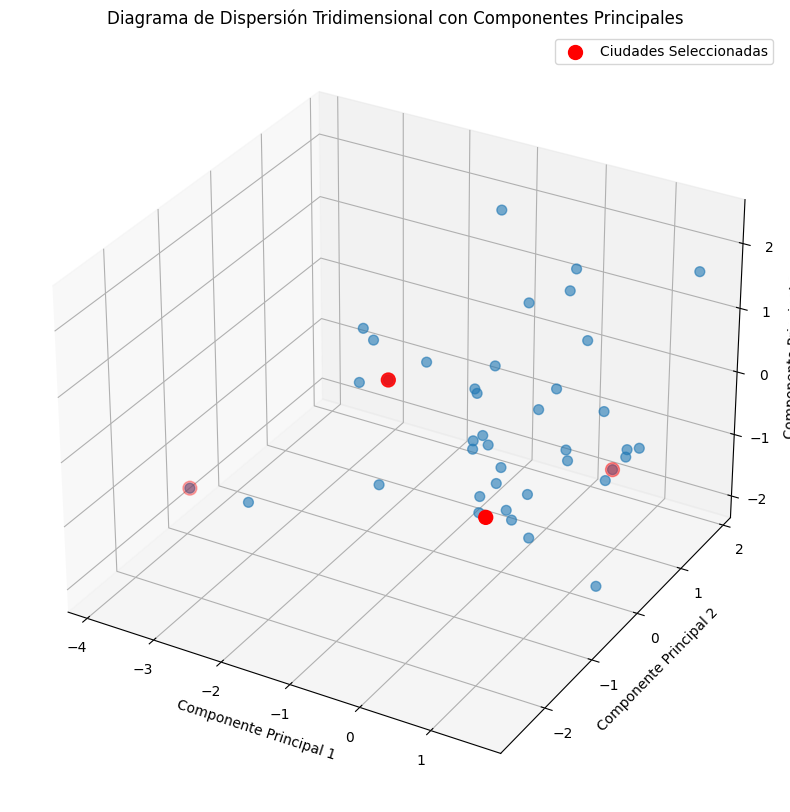

In [58]:
# Supongamos que 'df' es tu DataFrame con las componentes principales
# Asegúrate de tener las columnas correctas: 'Componente_1', 'Componente_2', 'Componente_3', ...

# Seleccionar 4 ciudades aleatorias
ciudades_aleatorias = df.sample(4)

# Mostrar información sobre las ciudades seleccionadas
print("Información sobre las ciudades seleccionadas:")
print(ciudades_aleatorias[['Ciudad', 'Componente_1', 'Componente_2', 'Componente_3']])

# Crear una figura tridimensional
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot tridimensional
scatter = ax.scatter(df['Componente_1'], df['Componente_2'], df['Componente_3'], s=50, alpha=0.6)

# Configurar etiquetas de ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Añadir un título
plt.title('Diagrama de Dispersión Tridimensional con Componentes Principales')

# Resaltar las ciudades seleccionadas
ax.scatter(ciudades_aleatorias['Componente_1'], ciudades_aleatorias['Componente_2'], ciudades_aleatorias['Componente_3'], s=100, color='red', label='Ciudades Seleccionadas')

# Mostrar el gráfico
plt.legend()
plt.show()
